In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [2]:
palette = ['#003f5c', '#7a5195', '#ef5675', '#ffa600'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Channel switch delay [μs]"

In [3]:
data = pd.read_csv('switch.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager,scenario,MLOn,paddingDelayUsec,transitionDelayUsec,channelSwitchDelay
0,1,1,1,1,3,37.39870,0.000133,1.298710,68.2651,1073224416,...,121.000,121.000,93.1316,912179.0,ns3::ThompsonSamplingWifiManager,3,0,32,128,5
1,1,2,1,1,3,59.26520,0.000286,1.464240,44.4088,698349480,...,120.986,120.986,130.5450,669207.0,ns3::ThompsonSamplingWifiManager,3,0,32,128,5
2,1,3,1,1,3,14.23100,0.000039,0.832182,93.4971,1470406624,...,121.000,121.000,37.2728,800816.0,ns3::ThompsonSamplingWifiManager,3,0,32,128,5
3,1,4,1,1,3,4.56605,0.000017,0.144303,104.0300,1636101416,...,121.000,121.000,18.5498,154512.0,ns3::ThompsonSamplingWifiManager,3,0,32,128,5
4,1,1,1,1,3,37.06260,0.000131,1.288250,68.6254,1078986504,...,120.978,120.978,92.3666,909691.0,ns3::ThompsonSamplingWifiManager,3,0,32,128,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,3002,4,1,1,3,4.96008,0.000018,0.163336,103.6000,1629346128,...,121.000,121.000,19.4820,174169.0,ns3::ThompsonSamplingWifiManager,3,0,0,256,50
2800,3002,1,1,1,3,41.49890,0.000156,1.334670,63.7749,1002931832,...,121.000,121.000,102.4430,876035.0,ns3::ThompsonSamplingWifiManager,3,0,32,256,55
2801,3002,2,1,1,3,49.02920,0.000176,1.357780,55.5599,873834168,...,120.998,120.998,100.4350,776488.0,ns3::ThompsonSamplingWifiManager,3,0,32,256,55
2802,3002,3,1,1,3,14.59170,0.000038,0.706449,93.1078,1464222808,...,121.000,121.000,36.4325,676963.0,ns3::ThompsonSamplingWifiManager,3,0,32,256,55


C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\2511416495.py:6: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=plot_sum, x='channelSwitchDelay', y='throughput', hue='flow', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\2511416495.py:14: UserWarning: Mismatched number of handles and labels: len(handles) = 7 len(labels) = 4
  ax.legend(


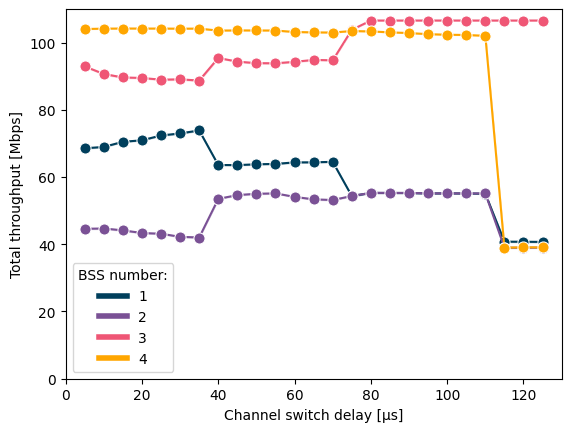

In [4]:
plot_sum = data.groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='channelSwitchDelay', y='throughput', hue='flow', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_linewidth(4) 
ax.legend(
      handles=handles[1:8],
      labels=['1', '2', '3', '4'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='medium',   # Rozmiar czcionki
        title='BSS number:',         # <- Tytuł legendy
        title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )
ax.set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
ax.set_xlim(0, 130)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
ax.set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
plt.savefig('dataRate_thr.svg', bbox_inches='tight')

In [5]:
# Flow 0: paddingDelayUsec = 0, transitionDelayUsec = 32
df0 = (
    data[(data['paddingDelayUsec'] == 0) & (data['transitionDelayUsec'] == 32)]
    .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow',
              'transitionDelayUsec', 'paddingDelayUsec', 'channelSwitchDelay'], as_index=False)
    .sum(numeric_only=True)
)

# Flow 1: paddingDelayUsec = 32, transitionDelayUsec = 32
df1 = (
    data[(data['paddingDelayUsec'] == 32) & (data['transitionDelayUsec'] == 32)]
    .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow',
              'transitionDelayUsec', 'paddingDelayUsec', 'channelSwitchDelay'], as_index=False)
    .sum(numeric_only=True)
)

# Flow 2: paddingDelayUsec = 128, transitionDelayUsec = 32
df2 = (
    data[(data['paddingDelayUsec'] == 128) & (data['transitionDelayUsec'] == 32)]
    .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow',
              'transitionDelayUsec', 'paddingDelayUsec', 'channelSwitchDelay'], as_index=False)
    .sum(numeric_only=True)
)

# Flow 3: paddingDelayUsec = 0, transitionDelayUsec = 128
df3 = (
    data[(data['paddingDelayUsec'] == 0) & (data['transitionDelayUsec'] == 128)]
    .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow',
              'transitionDelayUsec', 'paddingDelayUsec', 'channelSwitchDelay'], as_index=False)
    .sum(numeric_only=True)
)

# Flow 4: paddingDelayUsec = 32, transitionDelayUsec = 128
df4 = (
    data[(data['paddingDelayUsec'] == 32) & (data['transitionDelayUsec'] == 128)]
    .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow',
              'transitionDelayUsec', 'paddingDelayUsec', 'channelSwitchDelay'], as_index=False)
    .sum(numeric_only=True)
)

# Flow 5: paddingDelayUsec = 128, transitionDelayUsec = 128
df5 = (
    data[(data['paddingDelayUsec'] == 128) & (data['transitionDelayUsec'] == 128)]
    .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow',
              'transitionDelayUsec', 'paddingDelayUsec', 'channelSwitchDelay'], as_index=False)
    .sum(numeric_only=True)
)

# Flow 3: paddingDelayUsec = 0, transitionDelayUsec = 256
df6 = (
    data[(data['paddingDelayUsec'] == 0) & (data['transitionDelayUsec'] == 256)]
    .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow',
              'transitionDelayUsec', 'paddingDelayUsec', 'channelSwitchDelay'], as_index=False)
    .sum(numeric_only=True)
)

# Flow 4: paddingDelayUsec = 32, transitionDelayUsec = 256
df7 = (
    data[(data['paddingDelayUsec'] == 32) & (data['transitionDelayUsec'] == 256)]
    .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow',
              'transitionDelayUsec', 'paddingDelayUsec', 'channelSwitchDelay'], as_index=False)
    .sum(numeric_only=True)
)

# Flow 5: paddingDelayUsec = 128, transitionDelayUsec = 256
df8 = (
    data[(data['paddingDelayUsec'] == 128) & (data['transitionDelayUsec'] == 256)]
    .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow',
              'transitionDelayUsec', 'paddingDelayUsec', 'channelSwitchDelay'], as_index=False)
    .sum(numeric_only=True)
)



In [6]:
df3

,scenario,distance,linksNumber,rngRun,flow,transitionDelayUsec,paddingDelayUsec,channelSwitchDelay,nStations,loss,...,txBytes,rxPackets,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,MLOn
0,3,1,3,100,1,128,0,5,1,36.94200,...,1714380856,707496,1121977,1.01718,1.01718,120.997,120.997,91.9830,911812.0,0
1,3,1,3,100,1,128,0,10,1,36.87160,...,1714380856,708286,1121977,1.01740,1.01740,121.000,121.000,91.9213,916163.0,0
2,3,1,3,100,1,128,0,15,1,35.15870,...,1714380856,727504,1121977,1.01927,1.01927,120.993,120.993,88.0303,922753.0,0
3,3,1,3,100,1,128,0,20,1,35.22820,...,1714380856,726725,1121977,1.01818,1.01818,121.000,121.000,88.1837,920175.0,0
4,3,1,3,100,1,128,0,25,1,33.15000,...,1714380856,750042,1121977,1.01428,1.01428,121.000,121.000,83.4393,932122.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3,1,3,1001,4,128,0,75,1,5.11151,...,1714380856,1064627,1121977,1.01109,1.01109,121.000,121.000,19.6784,180637.0,0
304,3,1,3,1001,4,128,0,80,1,5.21419,...,1714380856,1063475,1121977,1.00787,1.00787,121.000,121.000,19.9145,182782.0,0
305,3,1,3,1001,4,128,0,85,1,5.46696,...,1714380856,1060639,1121977,1.00819,1.00819,121.000,121.000,20.6322,200586.0,0
306,3,1,3,1001,4,128,0,90,1,5.64459,...,1714380856,1058646,1121977,1.00819,1.00819,121.000,121.000,20.9261,209874.0,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\3455149303.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\3455149303.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\3455149303.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\3455149303.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\3455149303.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\3455149303.py:32: UserWarning: Mismatched number of handles and labels: len(handles) 

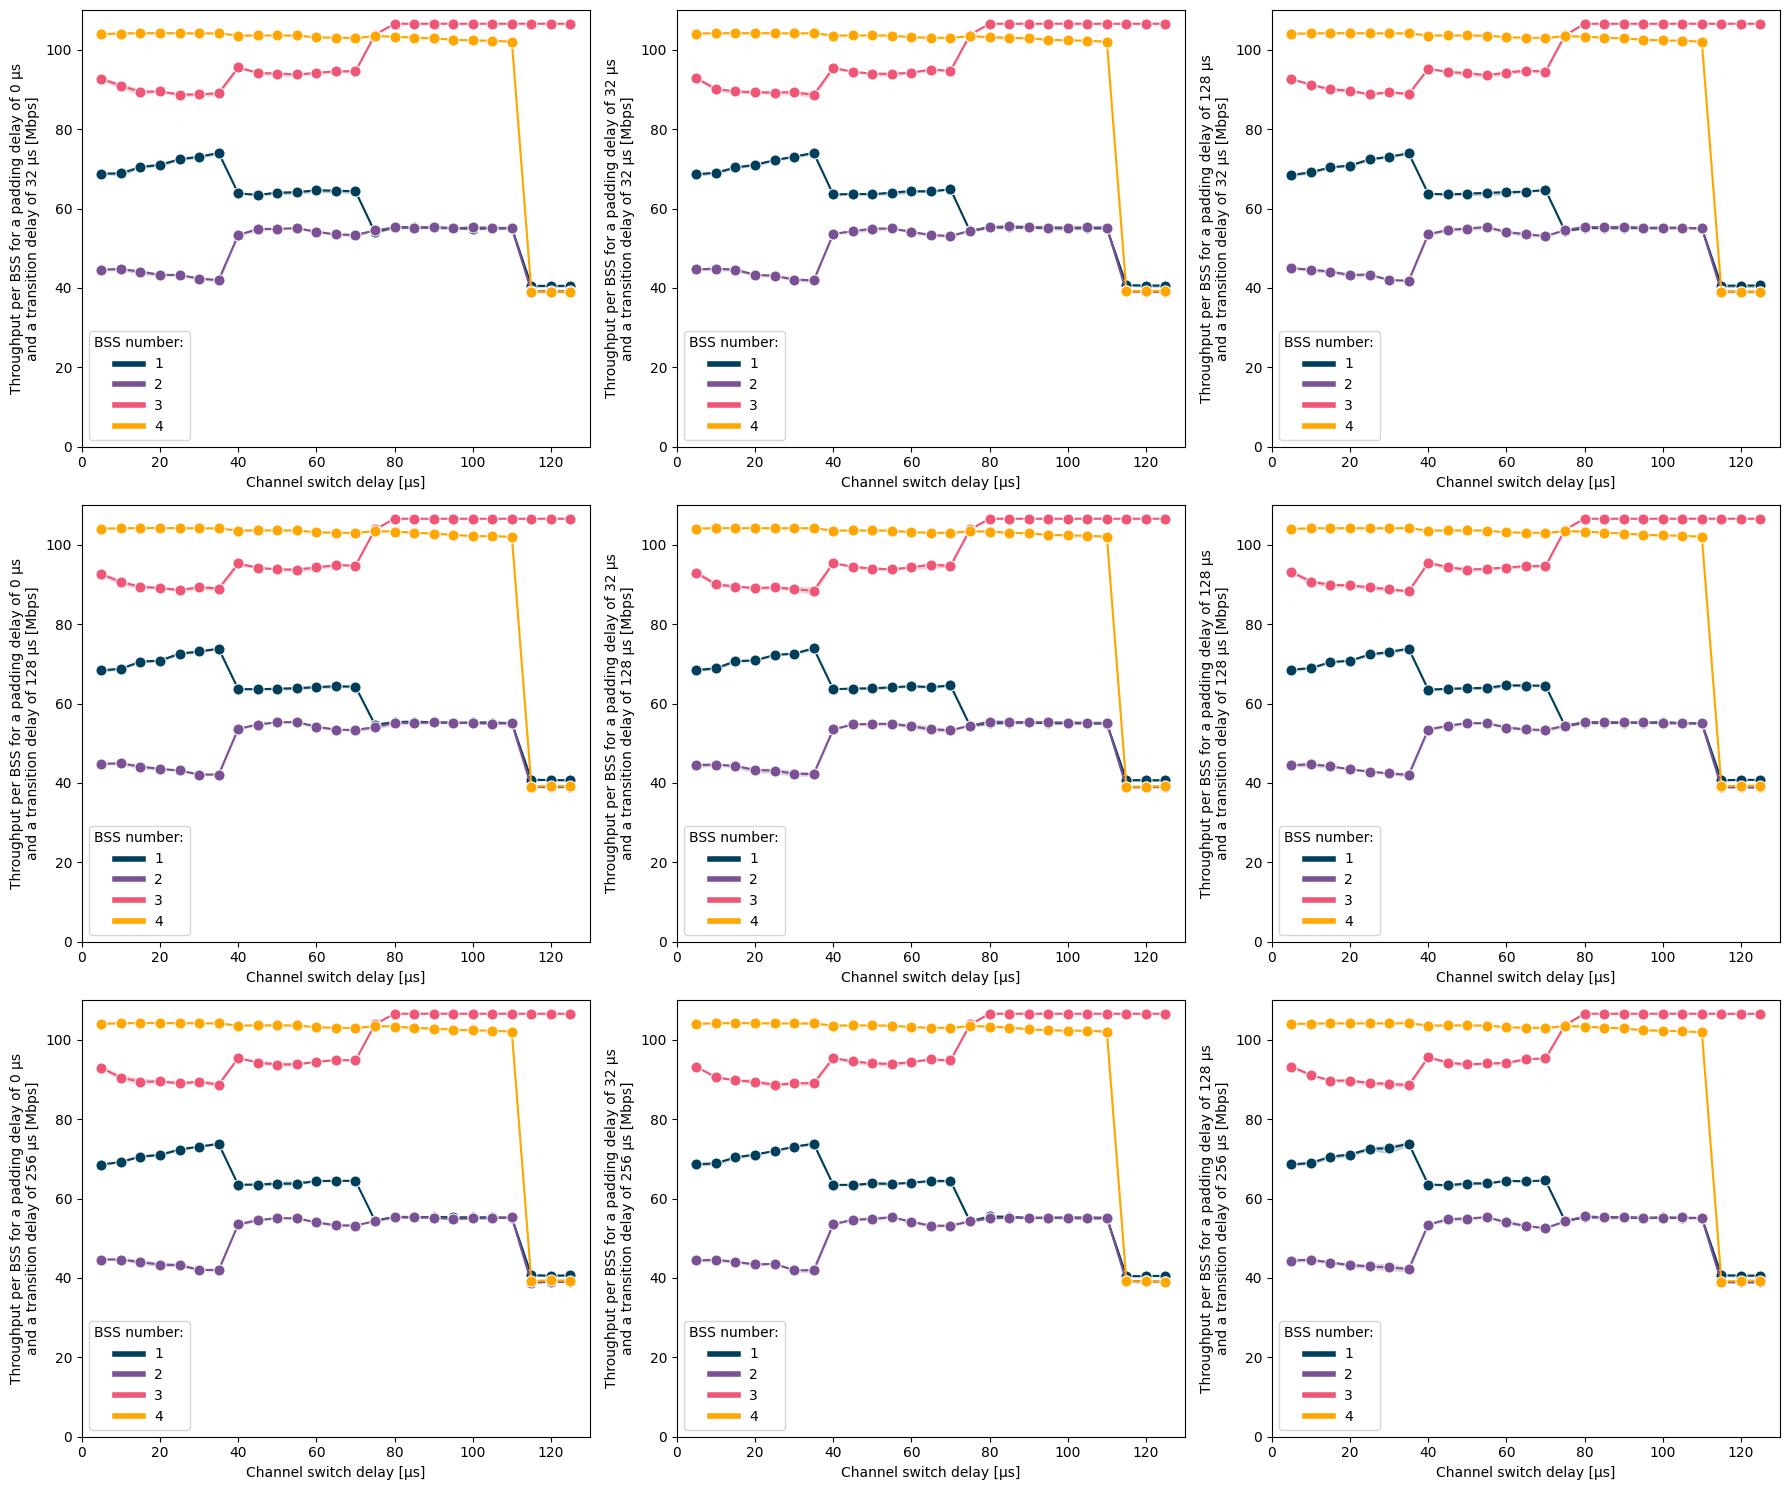

In [7]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(3, 3, figsize=(18, 15), sharey=False)  # Trzy wykresy w jednym rzędzie
axes = axes.flatten()  # <- kluczowa poprawka
xlabel = "Channel switch delay [μs]"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Throughput per BSS for a padding delay of 0 μs\nand a transition delay of 32 μs [Mbps]'),
    (df1, 'Throughput per BSS for a padding delay of 32 μs\nand a transition delay of 32 μs [Mbps]'),
    (df2, 'Throughput per BSS for a padding delay of 128 μs\nand a transition delay of 32 μs [Mbps]'),
    (df3, 'Throughput per BSS for a padding delay of 0 μs\nand a transition delay of 128 μs [Mbps]'),
    (df4, 'Throughput per BSS for a padding delay of 32 μs\nand a transition delay of 128 μs [Mbps]'),
    (df5, 'Throughput per BSS for a padding delay of 128 μs\nand a transition delay of 128 μs [Mbps]'),
    (df6, 'Throughput per BSS for a padding delay of 0 μs\nand a transition delay of 256 μs [Mbps]'),
    (df7, 'Throughput per BSS for a padding delay of 32 μs\nand a transition delay of 256 μs [Mbps]'),
    (df8, 'Throughput per BSS for a padding delay of 128 μs\nand a transition delay of 256 μs [Mbps]'),
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.lineplot(data=df, x='channelSwitchDelay', y='throughput', hue='flow', errorbar=('ci'), markers=True, palette=palette, ax=axes[i], style='nStations')

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    for handle in handles:
        handle.set_linewidth(4) 
    axes[i].legend(
        handles=handles[1:8],
        labels=['1', '2', '3', '4'],
        ncol=1,              # Liczba kolumn w legendzie
        fontsize='medium',   # Rozmiar czcionki
        title='BSS number:',         # <- Tytuł legendy
        title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )
    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_xlim(0, 130) #, 225 
    axes[i].set_ylim(0, 110) #, 225
    
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('switch_thr.svg', bbox_inches='tight')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\913944630.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\913944630.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\913944630.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\913944630.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\913944630.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\913944630.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 le

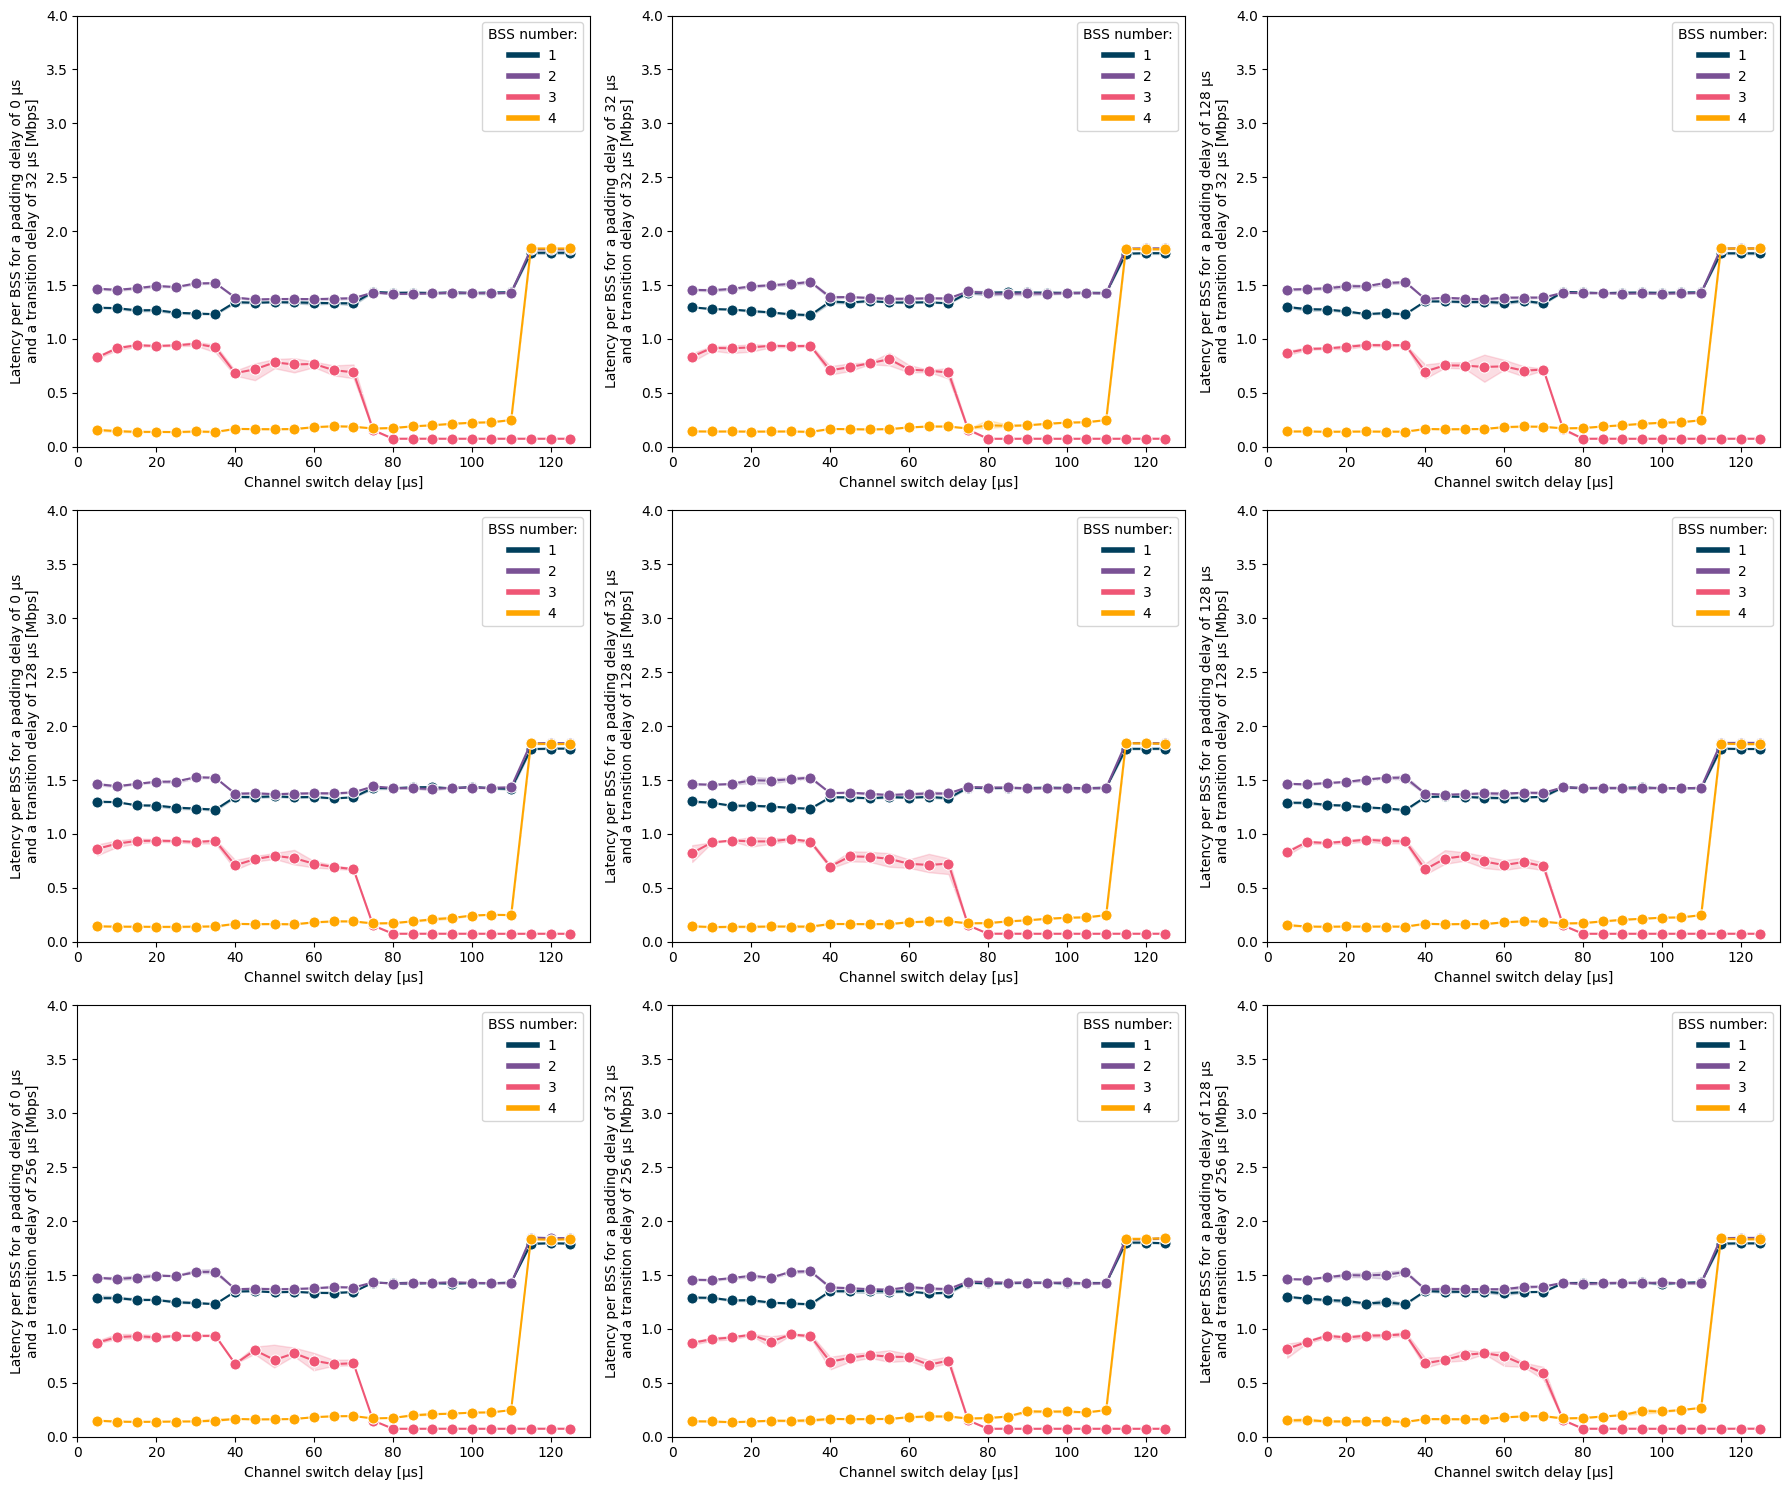

In [8]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(3, 3, figsize=(18, 15), sharey=False)  # Trzy wykresy w jednym rzędzie
axes = axes.flatten()  # <- kluczowa poprawka
xlabel = "Channel switch delay [μs]"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Latency per BSS for a padding delay of 0 μs\nand a transition delay of 32 μs [Mbps]'),
    (df1, 'Latency per BSS for a padding delay of 32 μs\nand a transition delay of 32 μs [Mbps]'),
    (df2, 'Latency per BSS for a padding delay of 128 μs\nand a transition delay of 32 μs [Mbps]'),
    (df3, 'Latency per BSS for a padding delay of 0 μs\nand a transition delay of 128 μs [Mbps]'),
    (df4, 'Latency per BSS for a padding delay of 32 μs\nand a transition delay of 128 μs [Mbps]'),
    (df5, 'Latency per BSS for a padding delay of 128 μs\nand a transition delay of 128 μs [Mbps]'),
    (df6, 'Latency per BSS for a padding delay of 0 μs\nand a transition delay of 256 μs [Mbps]'),
    (df7, 'Latency per BSS for a padding delay of 32 μs\nand a transition delay of 256 μs [Mbps]'),
    (df8, 'Latency per BSS for a padding delay of 128 μs\nand a transition delay of 256 μs [Mbps]'),
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.lineplot(data=df, x='channelSwitchDelay', y='latency', hue='flow', errorbar=('ci'), markers=True, palette=palette, ax=axes[i], style='nStations')

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    for handle in handles:
        handle.set_linewidth(4) 
    axes[i].legend(
        handles=handles[1:8],
        labels=['1', '2', '3', '4'],
        ncol=1,              # Liczba kolumn w legendzie
        fontsize='medium',   # Rozmiar czcionki
        title='BSS number:',         # <- Tytuł legendy
        title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )
    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_xlim(0, 130) #, 225 
    axes[i].set_ylim(0, 4) #, 225
    
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('switch_lat.svg', bbox_inches='tight')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\1421915310.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\1421915310.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\1421915310.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\1421915310.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\1421915310.py:32: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_33508\1421915310.py:32: UserWarning: Mismatched number of handles and labels: len(handles) 

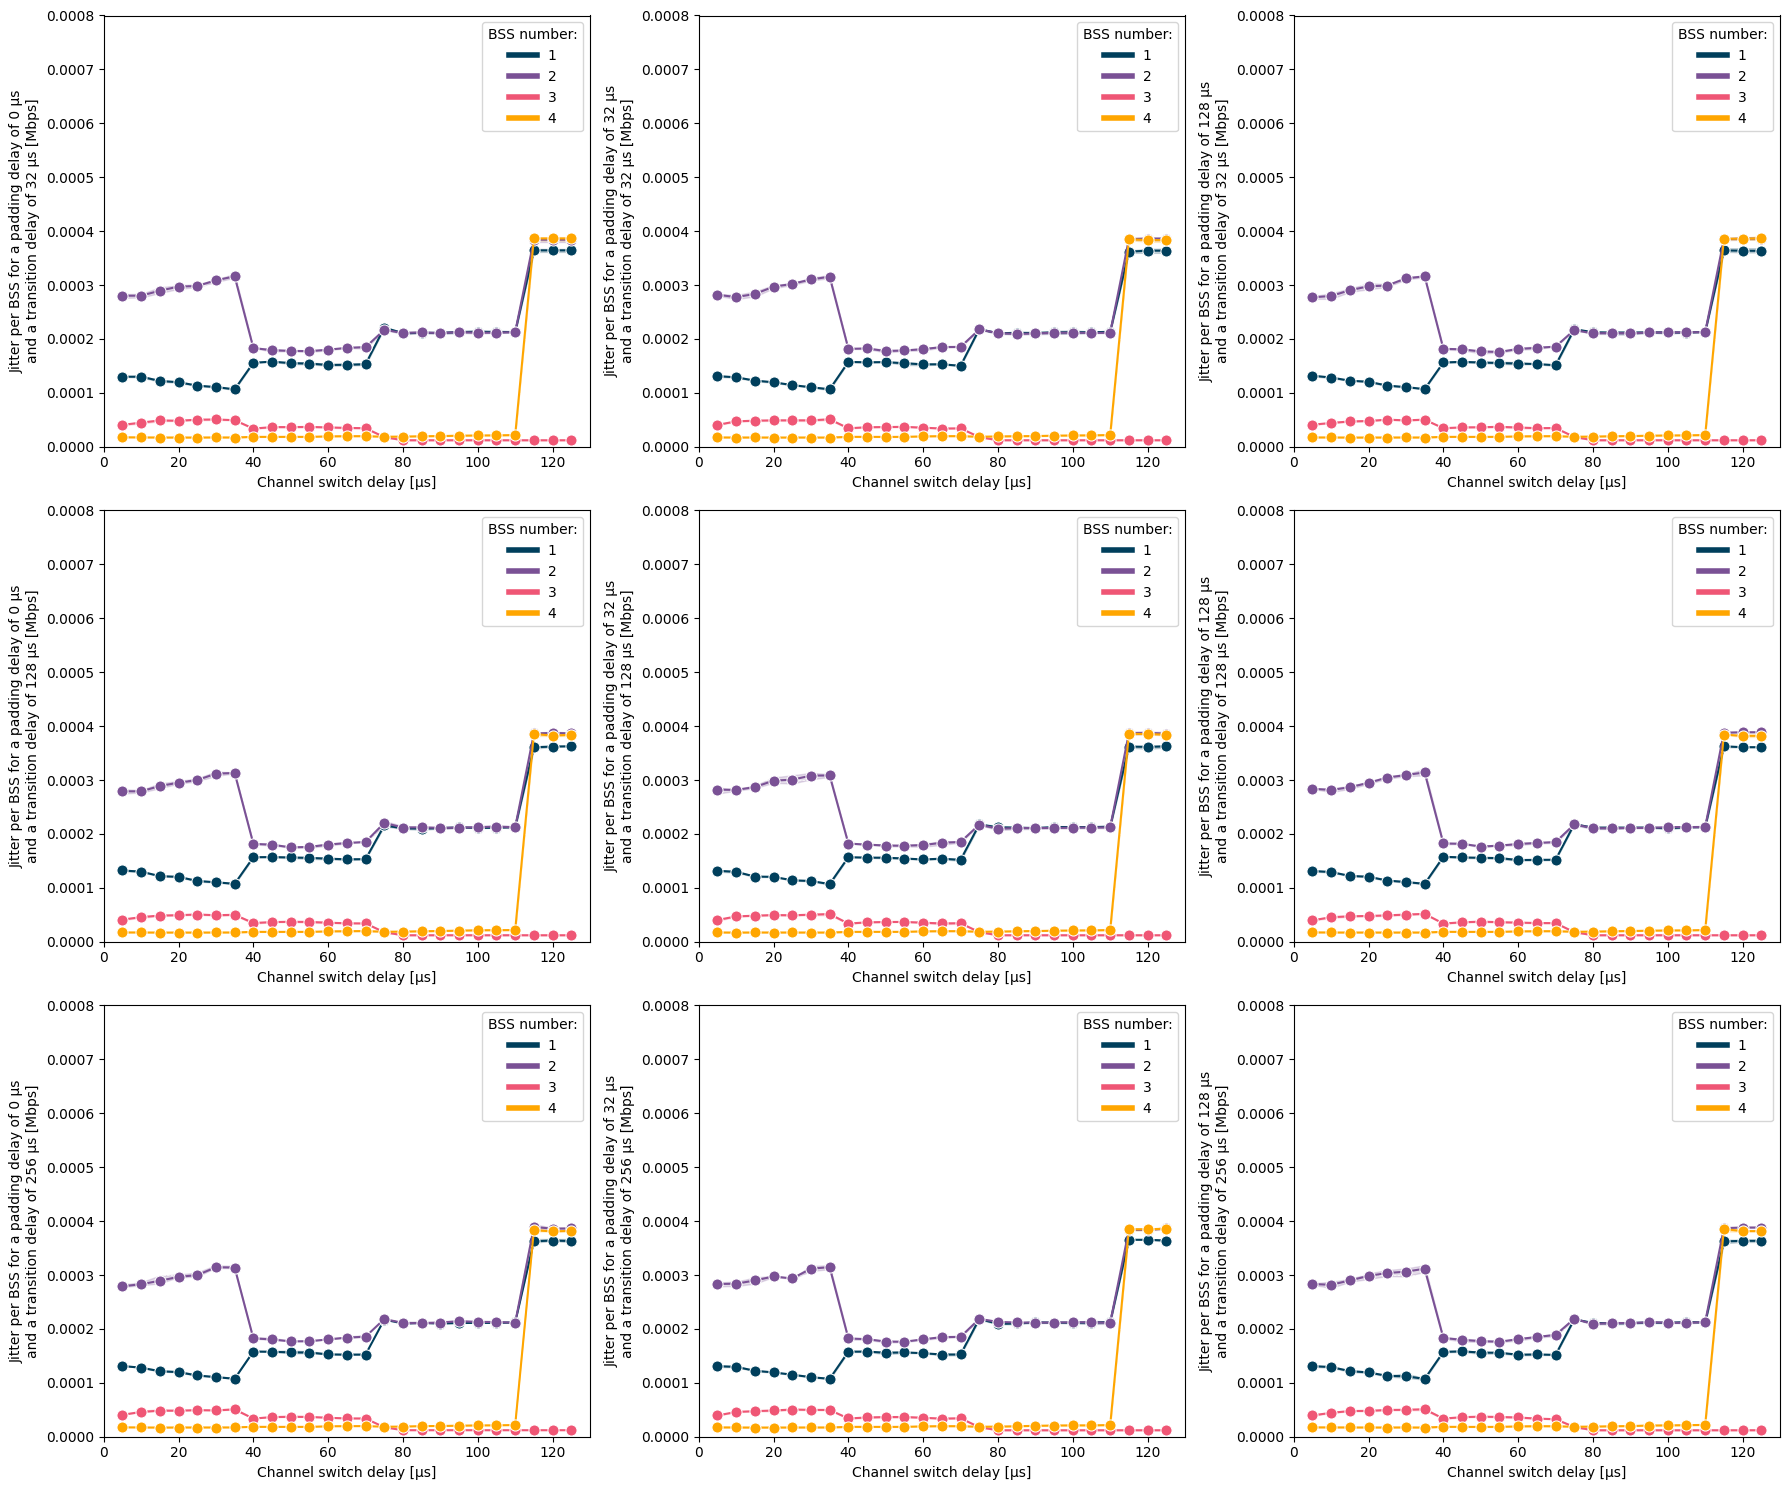

In [9]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(3, 3, figsize=(18, 15), sharey=False)  # Trzy wykresy w jednym rzędzie
axes = axes.flatten()  # <- kluczowa poprawka
xlabel = "Channel switch delay [μs]"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Jitter per BSS for a padding delay of 0 μs\nand a transition delay of 32 μs [Mbps]'),
    (df1, 'Jitter per BSS for a padding delay of 32 μs\nand a transition delay of 32 μs [Mbps]'),
    (df2, 'Jitter per BSS for a padding delay of 128 μs\nand a transition delay of 32 μs [Mbps]'),
    (df3, 'Jitter per BSS for a padding delay of 0 μs\nand a transition delay of 128 μs [Mbps]'),
    (df4, 'Jitter per BSS for a padding delay of 32 μs\nand a transition delay of 128 μs [Mbps]'),
    (df5, 'Jitter per BSS for a padding delay of 128 μs\nand a transition delay of 128 μs [Mbps]'),
    (df6, 'Jitter per BSS for a padding delay of 0 μs\nand a transition delay of 256 μs [Mbps]'),
    (df7, 'Jitter per BSS for a padding delay of 32 μs\nand a transition delay of 256 μs [Mbps]'),
    (df8, 'Jitter per BSS for a padding delay of 128 μs\nand a transition delay of 256 μs [Mbps]'),
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.lineplot(data=df, x='channelSwitchDelay', y='jitter', hue='flow', errorbar=('ci'), markers=True, palette=palette, ax=axes[i], style='nStations')

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    for handle in handles:
        handle.set_linewidth(4) 
    axes[i].legend(
        handles=handles[1:8],
        labels=['1', '2', '3', '4'],
        ncol=1,              # Liczba kolumn w legendzie
        fontsize='medium',   # Rozmiar czcionki
        title='BSS number:',         # <- Tytuł legendy
        title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )
    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_xlim(0, 130) #, 225 
    axes[i].set_ylim(0, 0.0008) #, 225
    
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('switch_jit.svg', bbox_inches='tight')
plt.show()